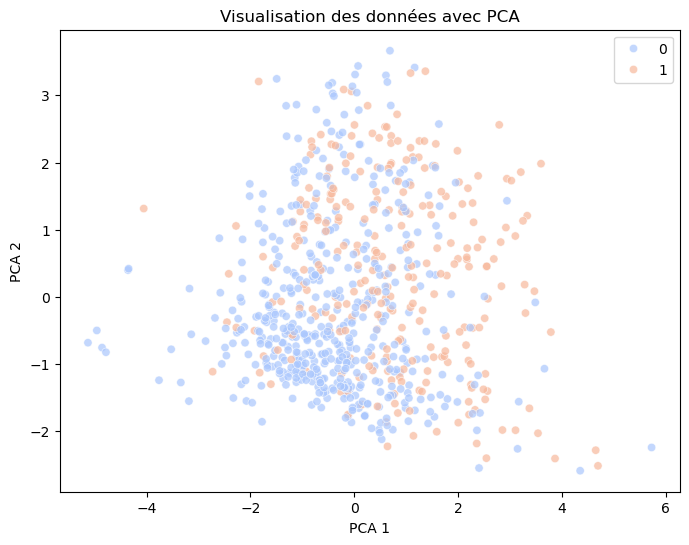


Accuracy (SVM RBF): 0.7575757575757576

Accuracy (SVM Linéaire): 0.7835497835497836
Meilleurs paramètres: {'C': 1, 'gamma': 0.01}
Performance du modèle sans optimisation:
Accuracy: 0.7575757575757576
Performance du modèle avec optimisation:
Accuracy: 0.7835497835497836
Best parameters: {'C': 1, 'gamma': 0.01}
Best cross-validation score: 0.7634648667358948
Nombre de vecteurs supports par classe(RBF): [164 155]
Nombre de vecteurs supports par classe(Lineair): [144 142]


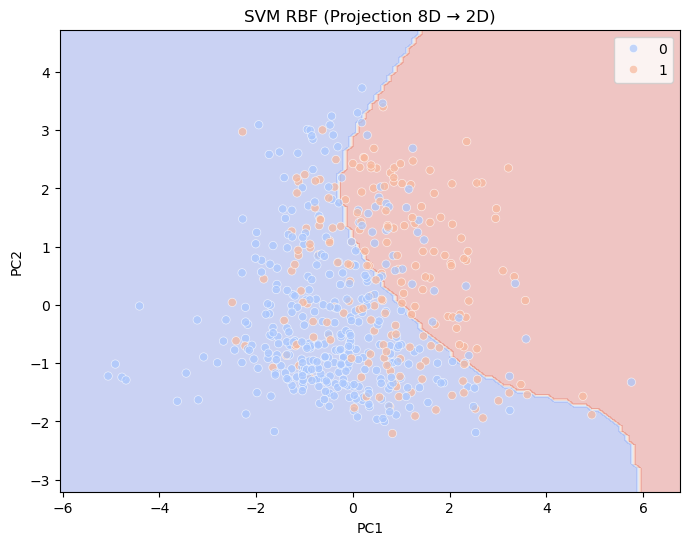

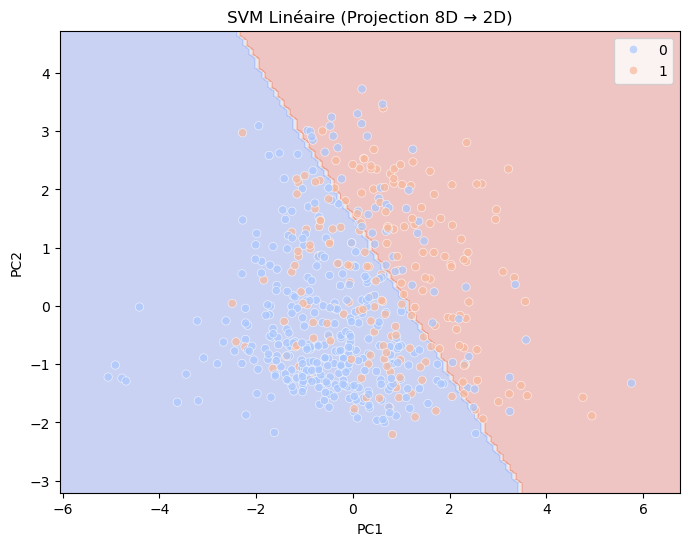

Évaluation du SVM RBF:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       157
           1       0.67      0.49      0.56        74

    accuracy                           0.76       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.75      0.76      0.75       231

Accuracy: 0.7575757575757576
Évaluation du SVM Linéaire:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.71      0.54      0.62        74

    accuracy                           0.78       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.78      0.78      0.77       231

Accuracy: 0.7835497835497836


In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Prétraitement des Données

# a) Charger le jeu de données choisi via scikit-learn
path = kagglehub.dataset_download("mathchi/diabetes-data-set")
data = pd.read_csv(path + "/diabetes.csv")

# Séparer les caractéristiques et la cible
X = data.drop(columns=["Outcome"]).values  # Features
Y = data["Outcome"].values  # Cible (0 ou 1)

# b) PCA pour la visualisation uniquement
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisation des données avec PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=Y, palette="coolwarm", alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisation des données avec PCA")
plt.show()

# 2. Séparation du Jeu de Données

# a) Diviser le jeu de données en ensemble d'entraînement (70 %) et ensemble de test (30 %)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#normaliser les donner
scaler = StandardScaler()
X_scaled = scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
# 3. Modélisation avec SVM

# a) Entraîner un SVM non linéaire (noyau RBF) pour la classification multi-classes
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)

# Évaluer le modèle
print("\nAccuracy (SVM RBF):", accuracy_score(y_test, y_pred))

# b) Différence avec un SVM linéaire
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Évaluer le modèle linéaire
print("\nAccuracy (SVM Linéaire):", accuracy_score(y_test, y_pred_linear))

# 4. Optimisation des Hyperparamètres

# a) Recherche d'hyperparamètres avec GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# b) Comparaison des performances avec et sans optimisation
y_pred_optimized = grid_search.best_estimator_.predict(X_test)
print(f"Meilleurs paramètres: {grid_search.best_params_}")
print("Performance du modèle sans optimisation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Performance du modèle avec optimisation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized)}")

# c) Interprétation des résultats
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# 5. Analyse des Vecteurs Supports

# a) Nombre et répartition des vecteurs supports par classe
print(f"Nombre de vecteurs supports par classe(RBF): {svm_rbf.n_support_}")

print(f"Nombre de vecteurs supports par classe(Lineair): {svm_linear.n_support_}")

# b) Explication des vecteurs supports
# Les vecteurs supports sont les points les plus proches de la frontière de décision.
# Ils déterminent la position et l'orientation de la frontière de décision.

# 6. Visualisation des Frontières de Décision

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_scaled_train)

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def plot_decision_boundary_8D_to_2D(model, X_original, X_pca, y, title,t11):
    # Générer une grille de points en 2D (PCA)
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Transformer la grille 2D en données 8D (approximation inverse)
    pca_inverse = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
    scaler_inverse = scaler.inverse_transform(pca_inverse)  # Annuler la normalisation

    # Prédire avec le modèle 8D
    Z = model.predict(scaler_inverse)
    Z = Z.reshape(xx.shape)

    # Afficher la frontière
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="coolwarm", alpha=0.7)
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.savefig(t11)
    plt.show()

# Utilisation :
plot_decision_boundary_8D_to_2D(svm_rbf, X_train, X_pca_train, y_train, "SVM RBF (Projection 8D → 2D)","SVM RBF")
plot_decision_boundary_8D_to_2D(svm_linear, X_train, X_pca_train, y_train, "SVM Linéaire (Projection 8D → 2D)","SVM Linéaire")
# 7. Évaluation du Modèle

# a) Calcul des métriques d’évaluation
print("Évaluation du SVM RBF:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

print("Évaluation du SVM Linéaire:")
print(classification_report(y_test, y_pred_linear))
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear)}")
